<a href="https://colab.research.google.com/github/shauryashivam/Pattern-Recognition-Assignment/blob/main/Assignment_2_Question_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv("https://raw.githubusercontent.com/killer4639/PatternAssigment/main/Iris.csv")

In [ ]:
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
X=data.iloc[:,:-1]

In [ ]:
df=X

In [ ]:
X

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,1,5.1,3.5,1.4,0.2
1,2,4.9,3.0,1.4,0.2
2,3,4.7,3.2,1.3,0.2
3,4,4.6,3.1,1.5,0.2
4,5,5.0,3.6,1.4,0.2
...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3
146,147,6.3,2.5,5.0,1.9
147,148,6.5,3.0,5.2,2.0
148,149,6.2,3.4,5.4,2.3


In [ ]:
Y=[]
for i in range(len(data)):
    temp=1
    if data.iloc[i,-1]=='Iris-setosa':
        temp=0
    elif data.iloc[i,-1]=='Iris-virginica':
        temp=2
    Y.append(temp)

In [ ]:
Y

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2]

In [ ]:
Y=pd.DataFrame(Y)

In [ ]:
Y

,0
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [ ]:
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(X_train)
    distortions.append(kmeanModel.inertia_)

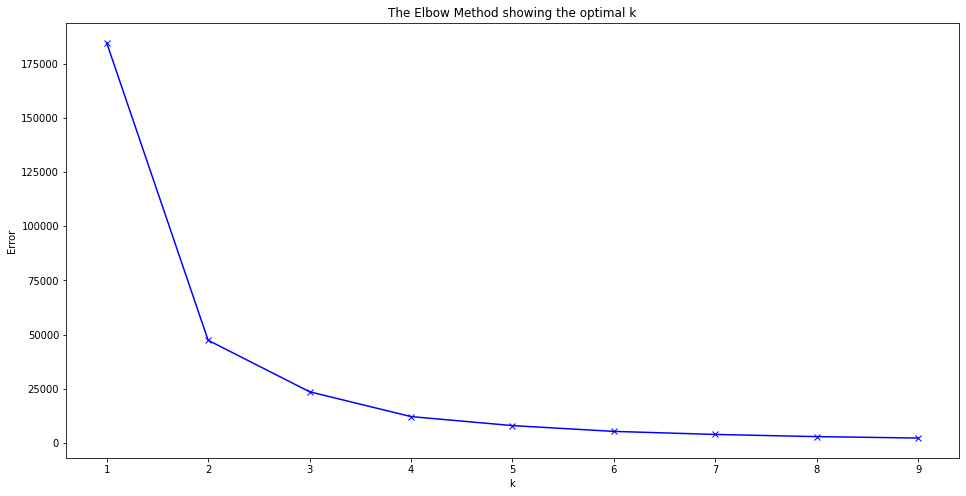

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Error')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [ ]:
#optimal number of clusters are 3

In [ ]:
kmeanModel = KMeans(n_clusters=3)
kmeanModel.fit(X_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
kmeanModel.predict(X_test)

array([2, 1, 0, 2, 2, 1, 2, 0, 2, 2, 0, 1, 1, 1, 1, 2, 0, 2, 2, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 2, 1, 1, 0, 1, 1, 1, 1, 0, 2, 2, 1,
       1], dtype=int32)

In [ ]:
k_means=kmeanModel.predict(X_test)
target=y_test



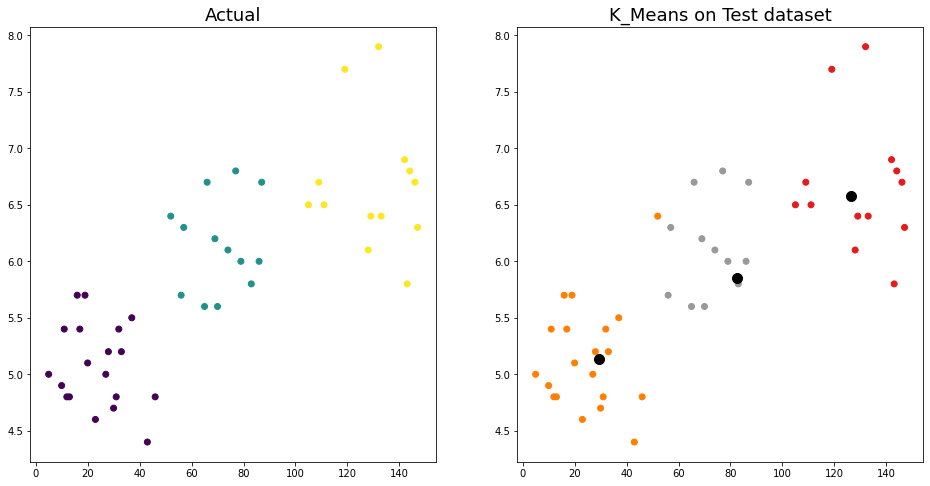

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(16,8))
axes[0].scatter(X_test.iloc[:,0], X_test.iloc[:,1], c=target)
axes[1].scatter(X_test.iloc[:,0], X_test.iloc[:,1], c=k_means, cmap=plt.cm.Set1)
axes[0].set_title('Actual', fontsize=18)
axes[1].set_title('K_Means on Test dataset', fontsize=18)
centroids = kmeanModel.cluster_centers_
plt.scatter(centroids[:,0] , centroids[:,1] , s = 100,c='BLACK')

In [ ]:
k_means=kmeanModel.predict(X_train)
target=y_train


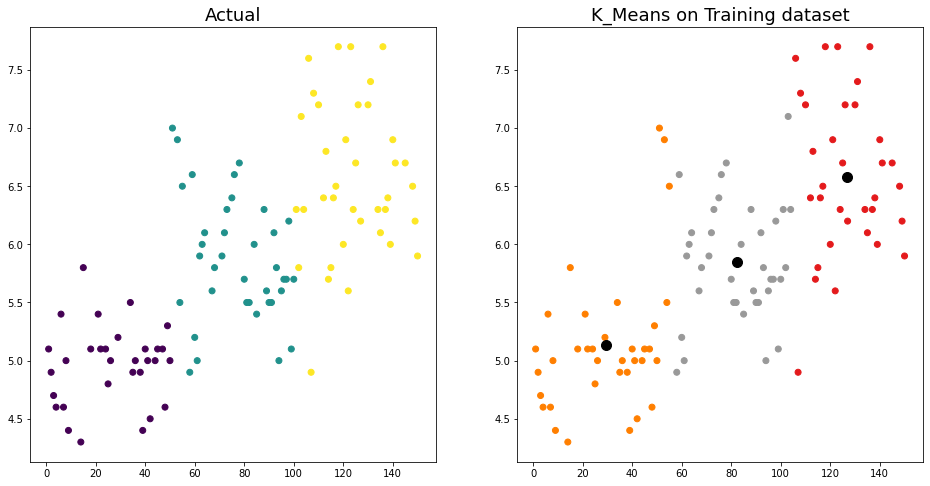

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(16,8))
axes[0].scatter(X_train.iloc[:,0], X_train.iloc[:,1], c=target)
axes[1].scatter(X_train.iloc[:,0], X_train.iloc[:,1], c=k_means, cmap=plt.cm.Set1)
axes[0].set_title('Actual', fontsize=18)
axes[1].set_title('K_Means on Training dataset', fontsize=18)
centroids = kmeanModel.cluster_centers_
plt.scatter(centroids[:,0] , centroids[:,1] , s = 100,c='BLACK')